In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import skew
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings(action='ignore')

print("All Modules Imported Successfully")

All Modules Imported Successfully


# READ DATASET

In [6]:
data = pd.read_csv("../data/CreditCard.csv")

In [7]:
creditcard_df = pd.DataFrame(data)

In [8]:
creditcard_df

,Unnamed: 0,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1315,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,1316,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,1317,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,1318,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


# DATA DESCRIPTION AND UNDERSTANDING

In [10]:
creditcard_df.describe()

,Unnamed: 0,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,660.000000,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,380.906813,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,1.000000,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,330.500000,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,660.000000,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,989.500000,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,1319.000000,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


In [11]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1319 non-null   int64  
 1   card         1319 non-null   object 
 2   reports      1319 non-null   int64  
 3   age          1319 non-null   float64
 4   income       1319 non-null   float64
 5   share        1319 non-null   float64
 6   expenditure  1319 non-null   float64
 7   owner        1319 non-null   object 
 8   selfemp      1319 non-null   object 
 9   dependents   1319 non-null   int64  
 10  months       1319 non-null   int64  
 11  majorcards   1319 non-null   int64  
 12  active       1319 non-null   int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 134.1+ KB


In [82]:
creditcard_df.isnull().sum()

Unnamed: 0     0
card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

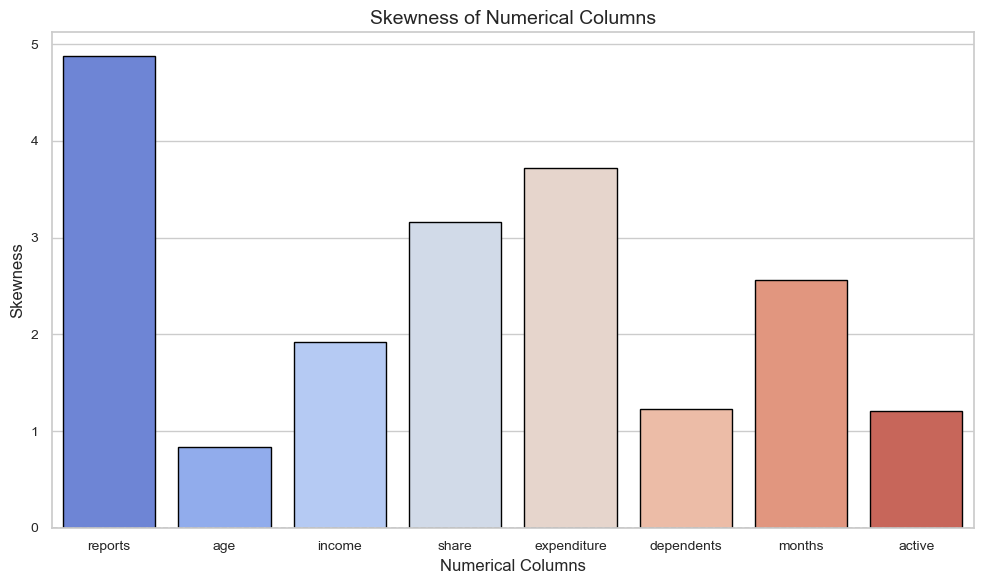

In [79]:
skewness_values = {col: skew(creditcard_df[col]) for col in numerical_cols}

skewness_df = pd.DataFrame(list(skewness_values.items()), columns=['Column', 'Skewness'])

plt.figure(figsize=(10, 6))
sns.barplot(x ='Column', y ='Skewness', data = skewness_df, palette='coolwarm', edgecolor='black')
plt.title('Skewness of Numerical Columns')
plt.xlabel('Numerical Columns')
plt.ylabel('Skewness')
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.tight_layout()
plt.show()


***Insights***

1. Reports (Skewness ~5): The most skewed variable, with a very high positive skewness. This indicates a large number of individuals have a low number of reports, while a small number have disproportionately higher report values (potential outliers).
2. Age (Skewness ~1):Age has a slight positive skew. This means that most individuals are on the younger side, with fewer older individuals, though the distribution is closer to being symmetric.
3. Income (Skewness ~2): Income shows moderate positive skewness, indicating that most individuals earn lower incomes, with fewer people having significantly higher incomes. There is a long right tail in the distribution.
4. Share (Skewness ~3): Share is also quite skewed, suggesting that most individuals have a small share, and a few have much larger shares, leading to a right-skewed distribution.
5. Expenditure (Skewness ~3.5): Expenditure shows significant skewness as well. Most people spend smaller amounts, and a small number spend a lot more. This indicates a right-skewed distribution with a few high-expenditure outliers.
6. Dependents (Skewness ~1): Dependents have mild skewness. Most people have fewer dependents (0-1), with fewer individuals having more dependents. This distribution is slightly skewed to the right.
7. Months (Skewness ~2): The months variable shows moderate skewness, indicating most people have lower durations (likely representing time spent with a service or in a system), while some individuals have significantly longer periods.
8. Active (Skewness ~1.5): Active has a moderate skew, showing that most people are less active, and a smaller number are significantly more active.

# UNIVARIATE ANALYSIS

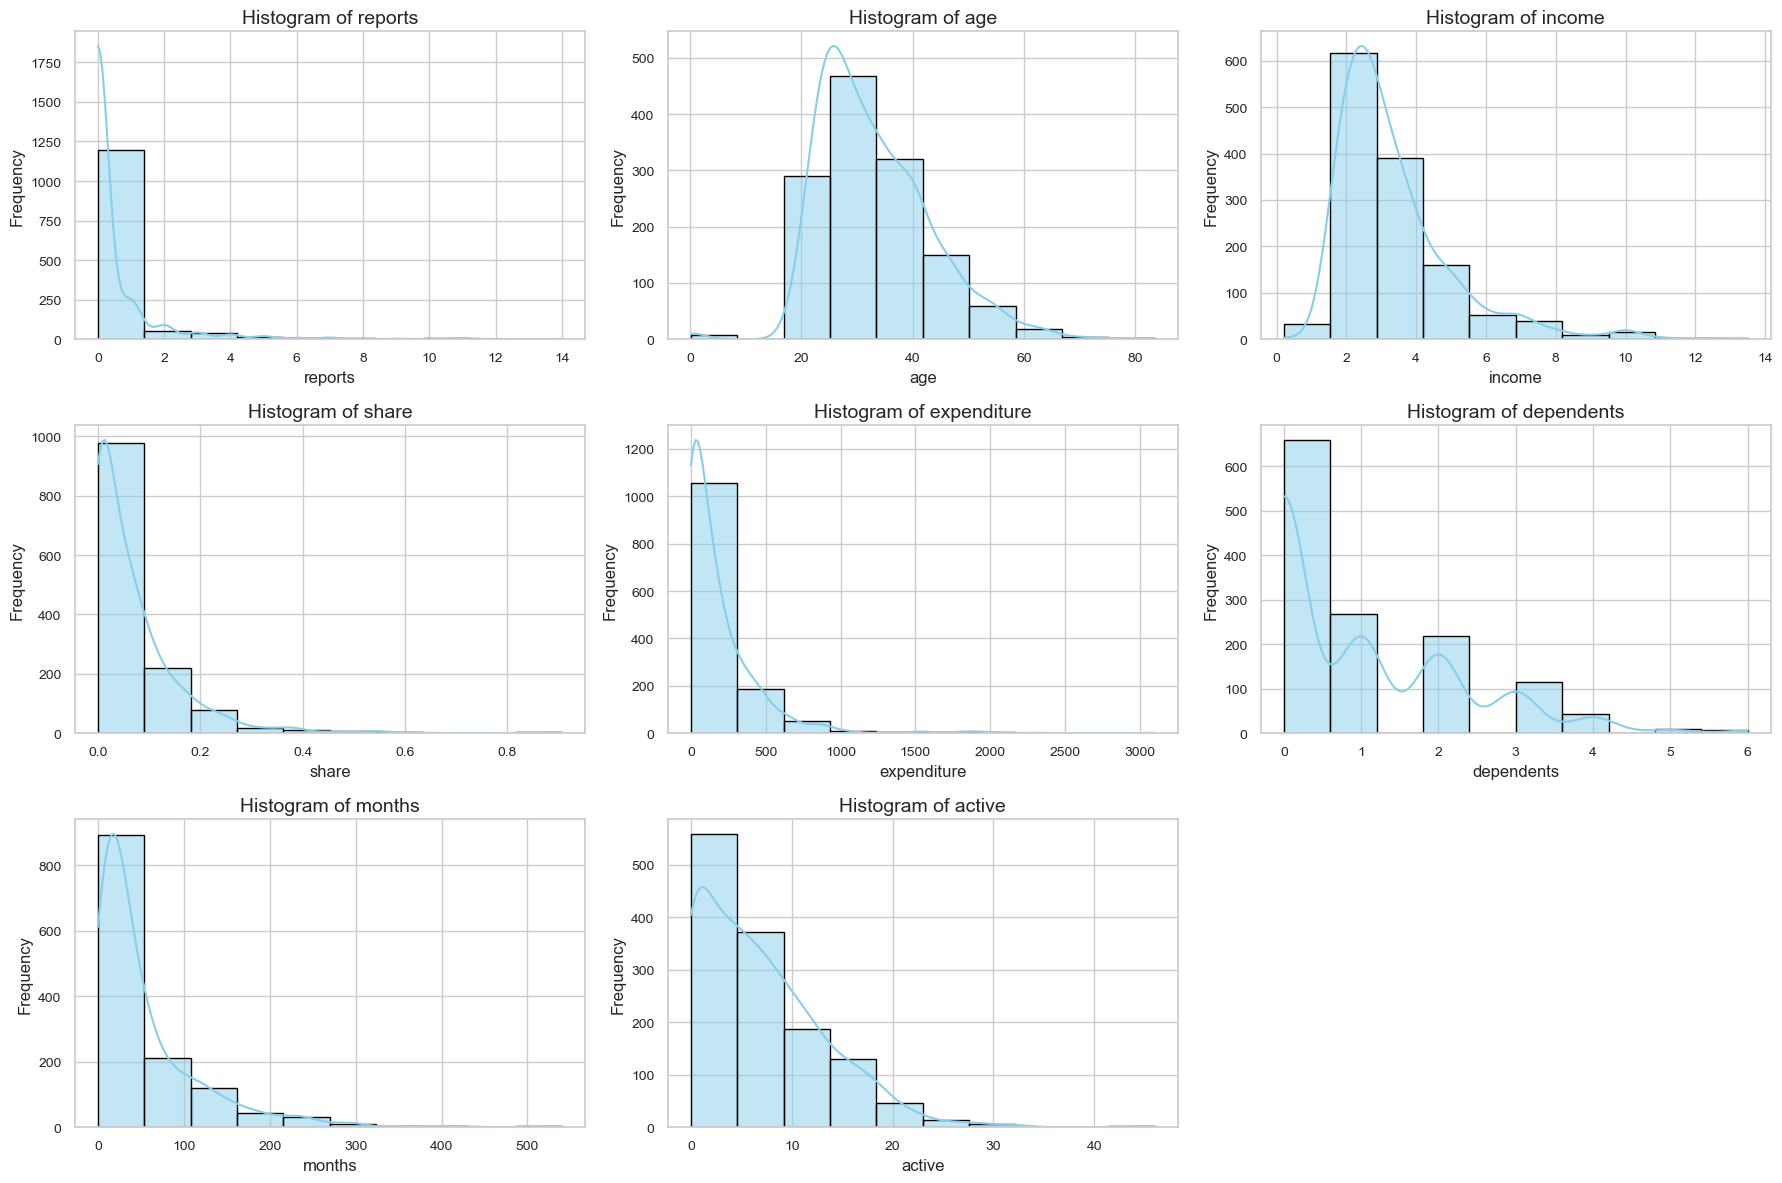

In [113]:
numerical_cols = ['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'active']

categorical_cols = ['owner', 'selfemp', 'majorcards']

sns.set(style="whitegrid")
plt.rcParams.update({'axes.titlesize': 14, 'axes.labelsize': 12, 'xtick.labelsize': 10, 'ytick.labelsize': 10})

plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(creditcard_df[col], kde = True, color='skyblue', edgecolor='black', bins=10)
    plt.title(f'Histogram of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



***INSIGHTS OF THE DISTRIBUTION PLOTS***
1. **Reports:**
   * The data is highly right-skewed, with most individuals having very few reports. A small number of individuals have much higher report values
2. **Age:**
   * This distribution is fairly normal but slightly right-skewed, with most individuals falling in the 20-40 age range. There are fewer individuals in the older age brackets (50+).
3. **Income:**
   * Income is also right-skewed. Most individuals have a lower income, and fewer have higher income values. This could imply that the majority of the population in this dataset earns below a certain threshold
4. **Share:**
   * The share distribution is very right-skewed, meaning most people have a very small share. A few individuals have significantly higher shares.
5. **Expenditure:**
   * The expenditure distribution is similar to the income distribution, showing right-skewness. Most people spend lower amounts, with fewer individuals spending much more.
6. **Dependents:**
    * This histogram shows a multimodal distribution. Many individuals have no dependents, while smaller groups have one, two, or three dependents. Very few have four or more dependents.
7. **Months:**
    * The months column, is highly right-skewed, indicating that most individuals have spent fewer months, with some staying much longer.
8. **Active:**
    * The active variable is again highly right-skewed, suggesting that most individuals are less active, with very few being highly active.


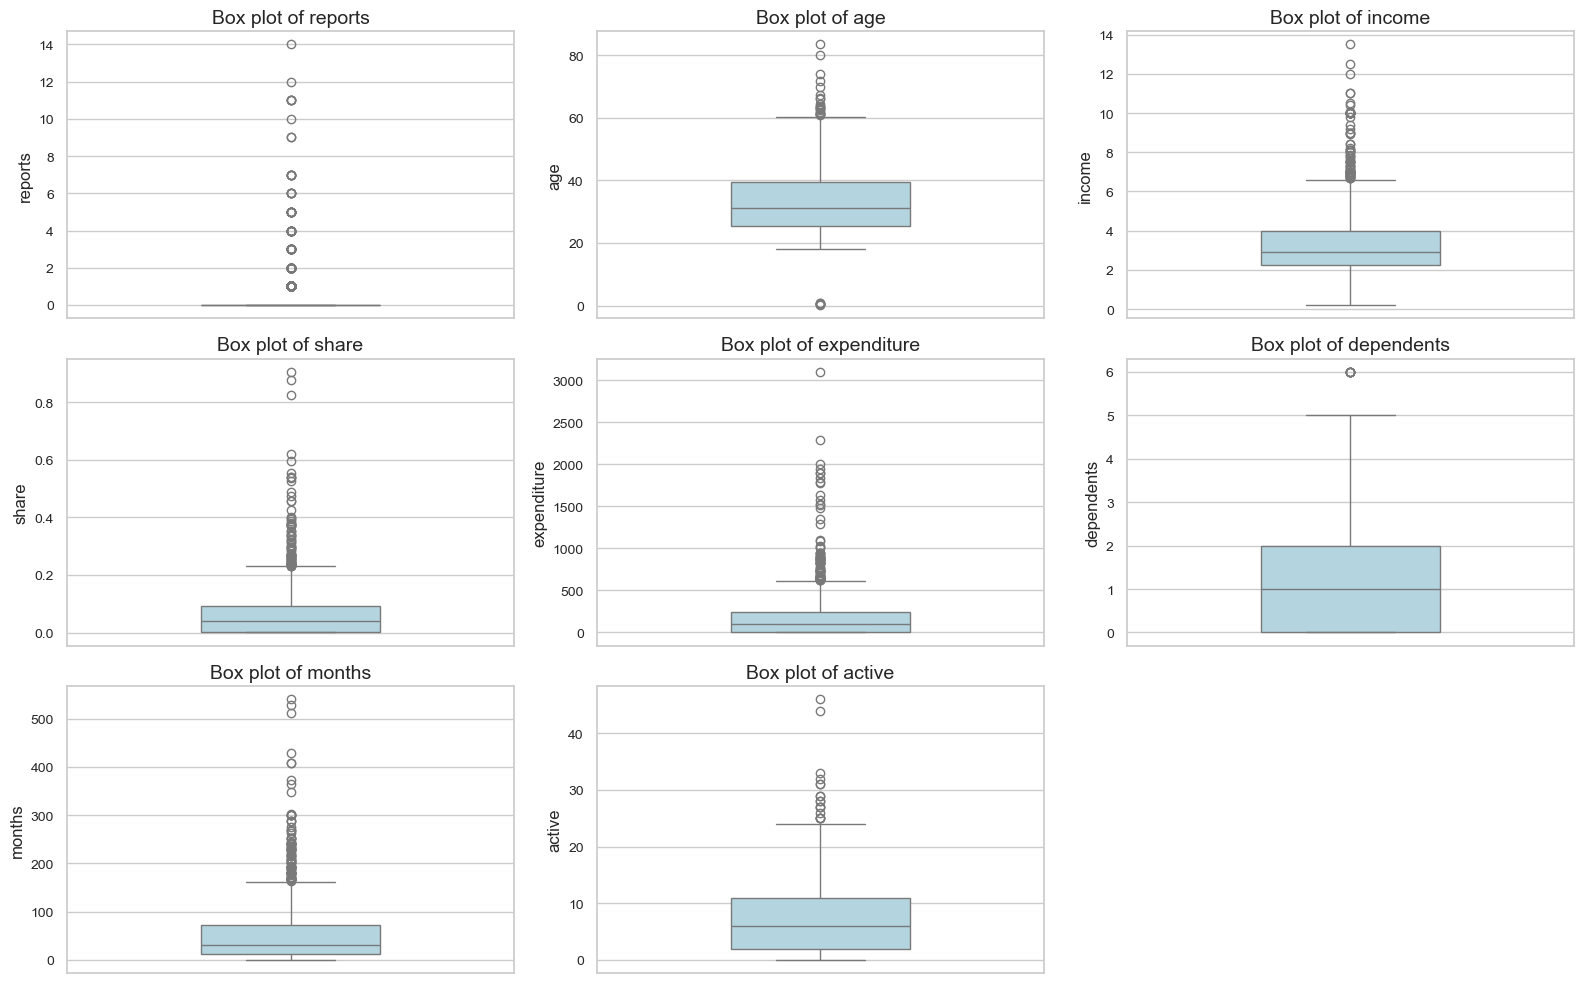

In [95]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y = creditcard_df[col], color='lightblue', width=0.4)
    plt.title(f'Box plot of {col}')
    plt.ylabel(f'{col}')

plt.tight_layout()
plt.show()

***INSIGHTS OF THE BOX PLOTS***

**Reports:**
* Highly skewed to the right
* Most values below 10
* Prominent outliers on the higher end

**Age:**
* Relatively symmetrical
* Median around 30
* Moderate IQR

**Income:**
* Slightly skewed to the right
* Median around 5
* Moderate IQR
* Some outliers on the higher end

**Share:**
* Skewed to the right
* Median around 0.2
* Most values below 0.5
* Prominent outliers on the higher end

**Expenditure:**
* Highly skewed to the right
* Median around 1000
* Most values below 2000
* Prominent outliers on the higher end

**Dependents:**
* Relatively symmetrical
* Median around 2
* Small IQR

**Months:**
* Skewed to the right
* Median around 200
* Most values below 300
* Prominent outliers on the higher end

**Active:**
* Slightly skewed to the right
* Median around 20
* Moderate IQR
* Some outliers on the higher end


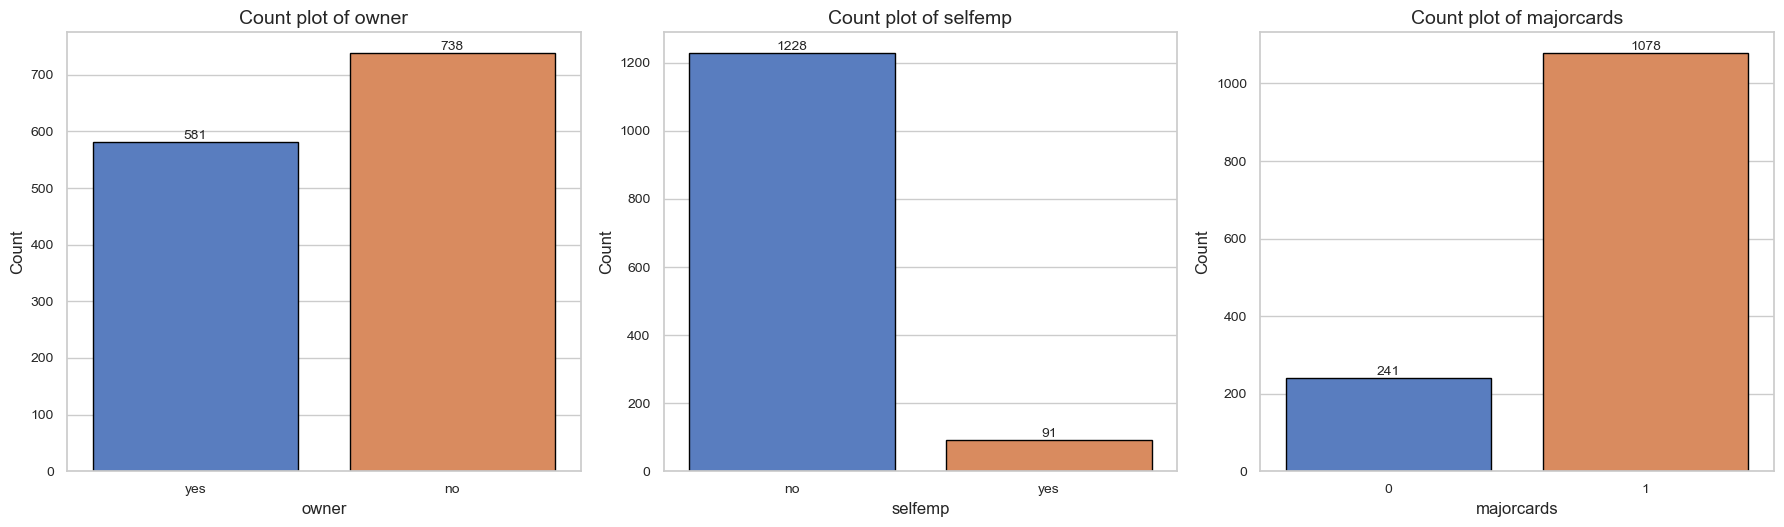

In [97]:
plt.figure(figsize = (18, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x = creditcard_df[col], palette = "muted", edgecolor='black')
    plt.title(f'Count plot of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    for p in plt.gca().patches:
        plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                           ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

***INSIGHTS OF THE COUNT DISTRIBUTION OF CATEGORICAL VARIABLES***

This set of three bar charts shows the count distribution for three categorical variables: **owner**, **selfemp**, and **majorcards**. Here are the key insights from each graph:

1. **Owner (Homeownership Status)**:
   - **Yes (581)**: 581 individuals own a home.
   - **No (738)**: 738 individuals do not own a home.
   - **Insight**: The dataset contains a higher proportion of individuals who do not own homes compared to those who do, with about 56% of the individuals being non-owners. This might indicate a population skewed towards renters or individuals without homeownership.

2. **Selfemp (Self-Employment Status)**:
   - **No (1228)**: 1,228 individuals are not self-employed.
   - **Yes (91)**: Only 91 individuals are self-employed.
   - **Insight**: A significant majority of the population (over 93%) are not self-employed, while a very small portion (about 7%) are self-employed. This suggests that the dataset is predominantly made up of salaried or traditionally employed individuals.

3. **Majorcards (Possession of Major Credit Cards)**:
   - **0 (241)**: 241 individuals do not have a major credit card.
   - **1 (1078)**: 1,078 individuals have at least one major credit card.
   - **Insight**: A vast majority of the individuals (approximately 82%) possess at least one major credit card, while around 18% do not. 

## BIVARIATE ANALYSIS

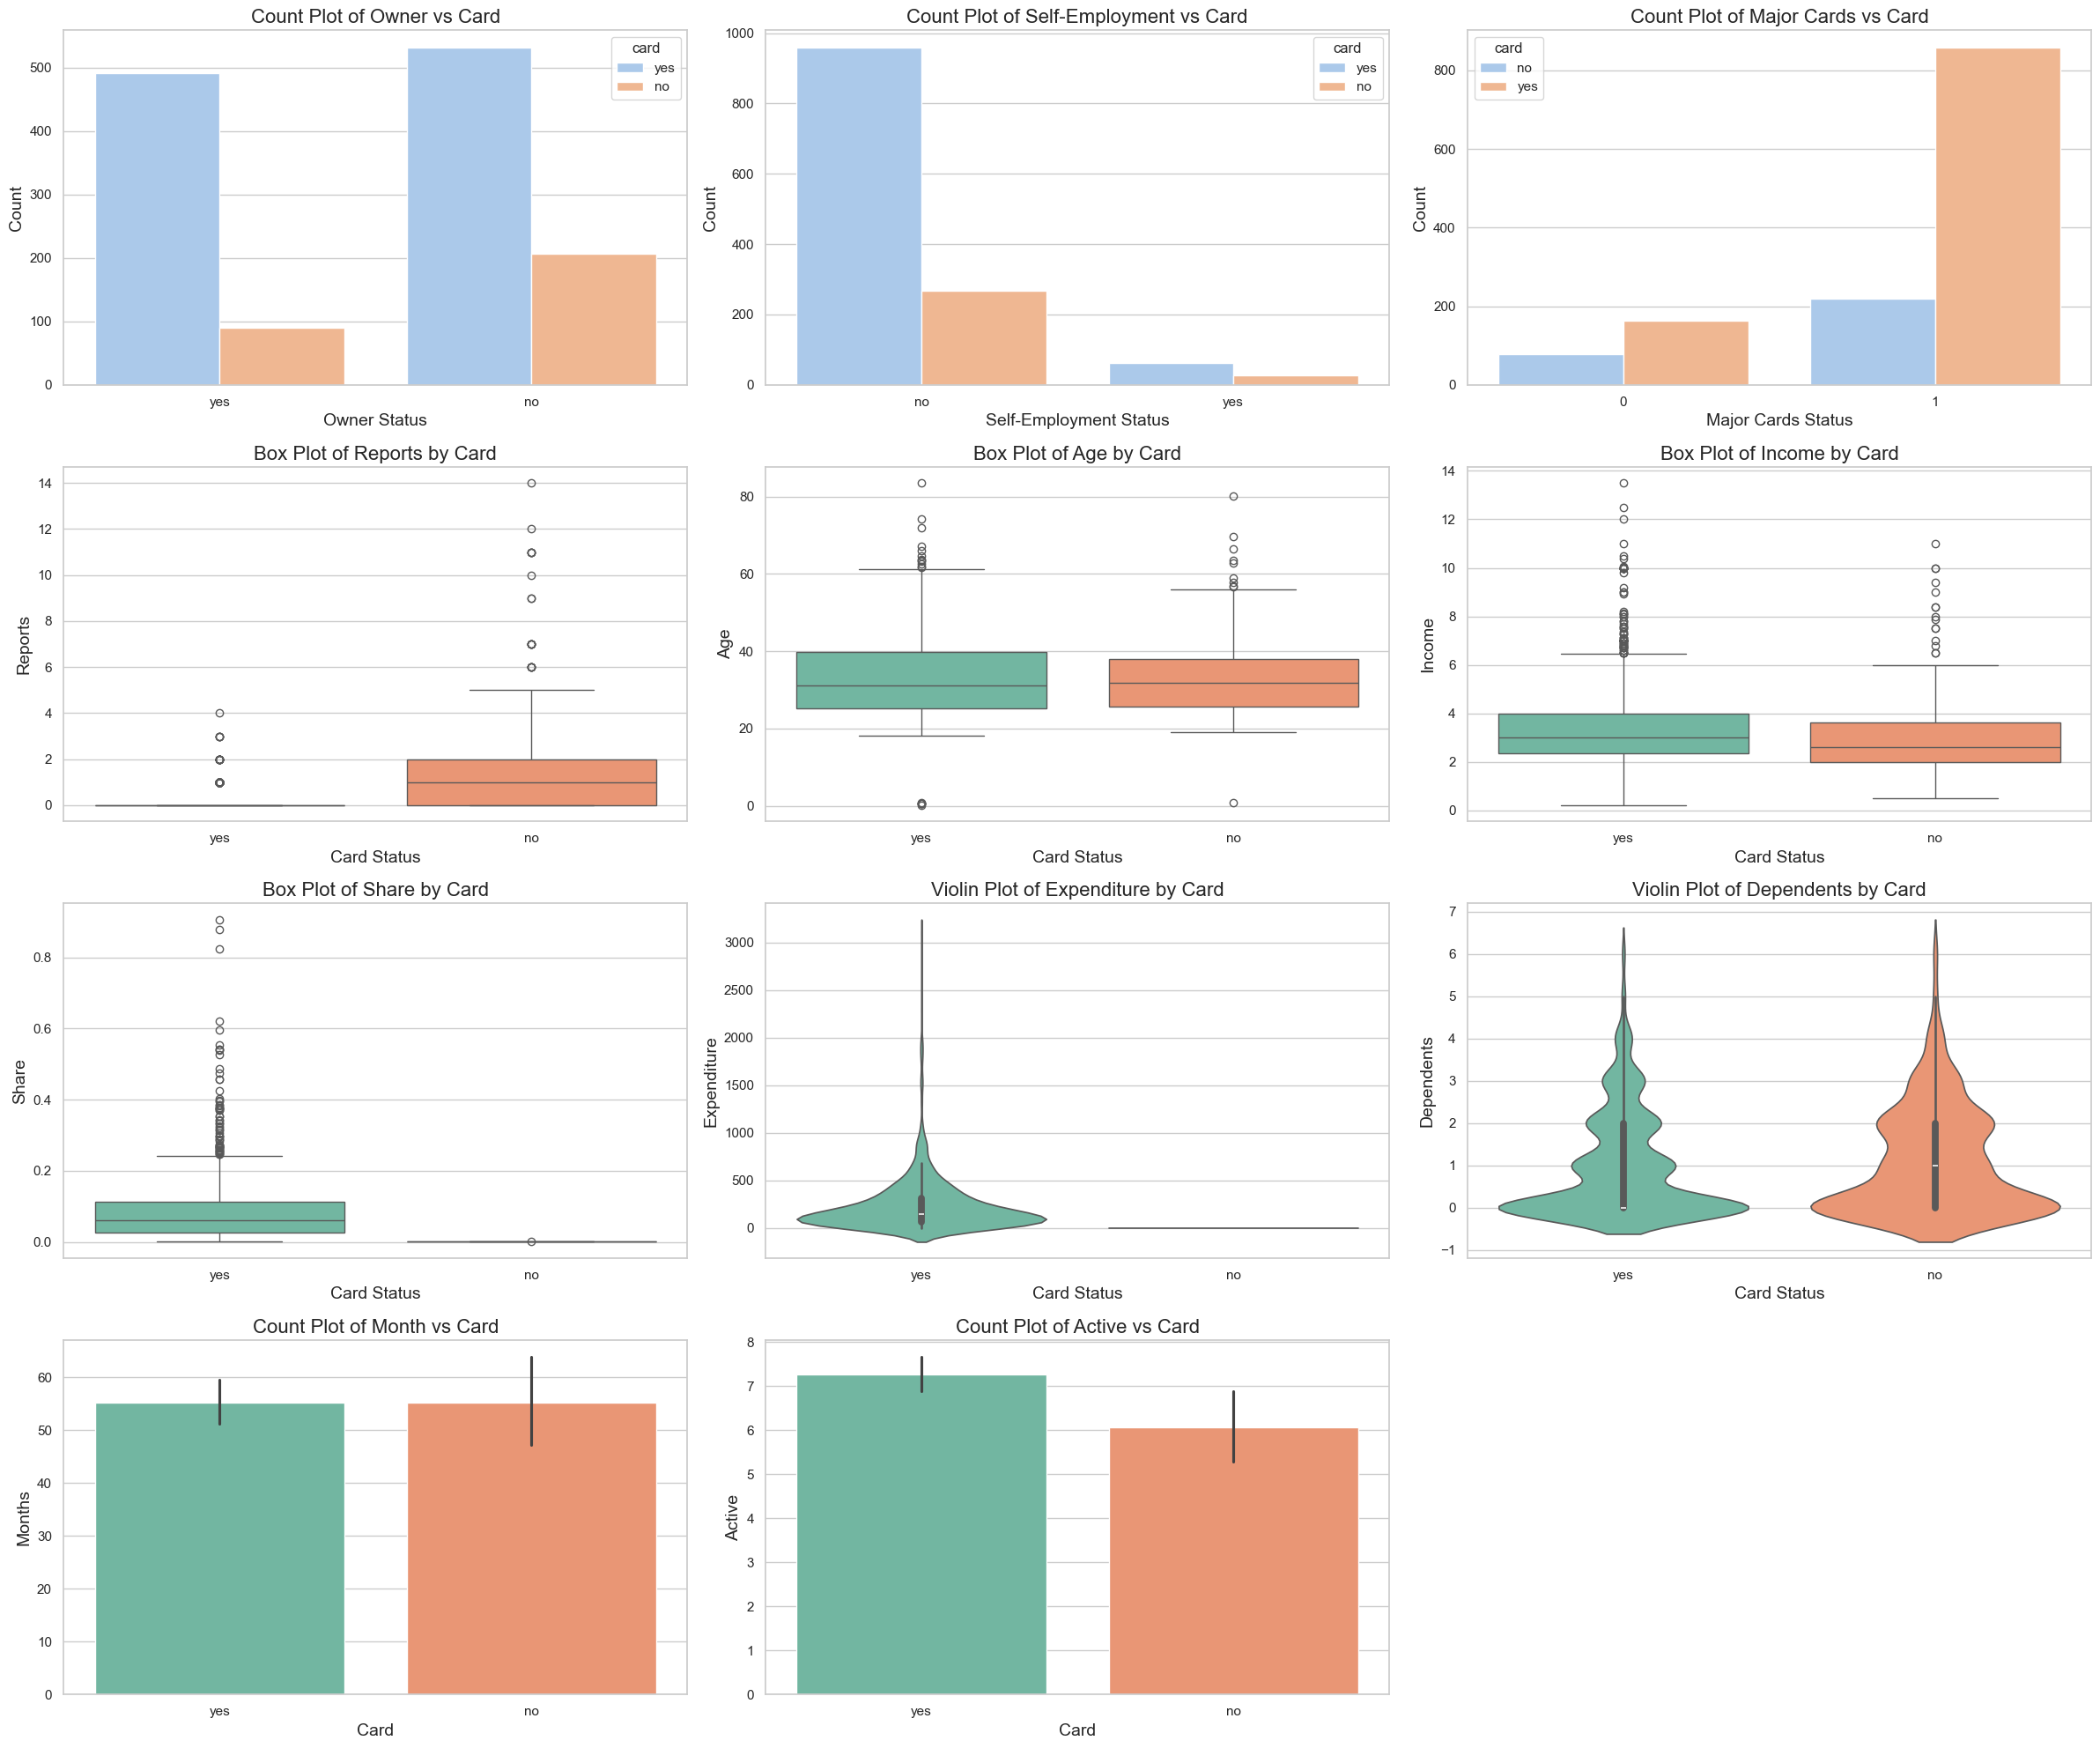

In [157]:
sns.set(style="whitegrid")
plt.figure(figsize=(24, 20))

# Categorical vs Categorical:
plt.subplot(4, 3, 1)
sns.countplot(x='owner', hue='card', data=creditcard_df, palette='pastel')
plt.title('Count Plot of Owner vs Card', fontsize=16)
plt.xlabel('Owner Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.subplot(4, 3, 2)
sns.countplot(x='selfemp', hue='card', data=creditcard_df, palette='pastel')
plt.title('Count Plot of Self-Employment vs Card', fontsize=16)
plt.xlabel('Self-Employment Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.subplot(4, 3, 3)
sns.countplot(x='majorcards', hue='card', data=creditcard_df, palette='pastel')
plt.title('Count Plot of Major Cards vs Card', fontsize=16)
plt.xlabel('Major Cards Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Categorical vs Numerical:
plt.subplot(4, 3, 4)
sns.boxplot(x='card', y='reports', data=creditcard_df, palette='Set2')
plt.title('Box Plot of Reports by Card', fontsize=16)
plt.xlabel('Card Status', fontsize=14)
plt.ylabel('Reports', fontsize=14)

plt.subplot(4, 3, 5)
sns.boxplot(x='card', y='age', data=creditcard_df, palette='Set2')
plt.title('Box Plot of Age by Card', fontsize=16)
plt.xlabel('Card Status', fontsize=14)
plt.ylabel('Age', fontsize=14)

plt.subplot(4, 3, 6)
sns.boxplot(x='card', y='income', data=creditcard_df, palette='Set2')
plt.title('Box Plot of Income by Card', fontsize=16)
plt.xlabel('Card Status', fontsize=14)
plt.ylabel('Income', fontsize=14)

plt.subplot(4, 3, 7)
sns.boxplot(x='card', y='share', data=creditcard_df, palette='Set2')
plt.title('Box Plot of Share by Card', fontsize=16)
plt.xlabel('Card Status', fontsize=14)
plt.ylabel('Share', fontsize=14)

plt.subplot(4, 3, 8)
sns.violinplot(x='card', y='expenditure', data=creditcard_df, palette='Set2')
plt.title('Violin Plot of Expenditure by Card', fontsize=16)
plt.xlabel('Card Status', fontsize=14)
plt.ylabel('Expenditure', fontsize=14)

plt.subplot(4, 3, 9)
sns.violinplot(x='card', y='dependents', data=creditcard_df, palette='Set2')
plt.title('Violin Plot of Dependents by Card', fontsize=16)
plt.xlabel('Card Status', fontsize=14)
plt.ylabel('Dependents', fontsize=14)

plt.subplot(4, 3, 10)
sns.barplot(x='card', y='months', data = creditcard_df, palette='Set2')
plt.title('Count Plot of Month vs Card', fontsize=16)
plt.xlabel('Card', fontsize=14)
plt.ylabel('Months', fontsize=14)

plt.subplot(4, 3, 11)
sns.barplot(x='card', y='active', data = creditcard_df, palette='Set2')
plt.title('Count Plot of Active vs Card', fontsize=16)
plt.xlabel('Card', fontsize=14)
plt.ylabel('Active', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()


***Key Insights:***

* **Owner Status:** The count plot of Owner vs Card shows that most cardholders are owners, with a smaller proportion being non-owners.
* **Self-Employment Status:** The count plot of Self-Employment vs Card indicates that a majority of cardholders are not self-employed, while a significant portion is self-employed.
* **Major Cards Status:** The count plot of Major Cards vs Card reveals that the distribution of major cards is relatively balanced across different card statuses.
* **Reports:** The box plot of Reports by Card suggests that the median number of reports is similar across all card statuses, with some variation in the range of reports.
* **Age:** The box plot of Age by Card indicates that the age distribution is comparable across different card statuses, with a slight tendency for cardholders with status 2 to be slightly younger.
* **Income:** The box plot of Income by Card shows that the income levels are generally higher for cardholders with status 2, followed by status 1 and then status 0.
* **Share:** The box plot of Share by Card suggests that the share values are distributed similarly across all card statuses.
* **Expenditure:** The violin plot of Expenditure by Card reveals that cardholders with status 2 tend to have higher expenditure levels compared to those with status 0 and 1.
* **Dependents:** The violin plot of Dependents by Card indicates that cardholders with status 1 have a slightly higher number of dependents on average compared to those with status 0 and 2.
* **Month:** The count plot of Month vs Card shows a relatively uniform distribution of cardholders across different months.
* **Active:** The count plot of Active vs Card suggests that a majority of cardholders are active, with a smaller proportion being inactive.

## CHI-SQUARE TEST, T-TEST, HYPOTHESIS TESTING, MANN AND WHITNEY U TEST

In [165]:
contingency_table = pd.crosstab(creditcard_df['card'], creditcard_df['owner'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")


Chi2 Statistic: 28.11407333689662
P-Value: 1.1437115047558145e-07
Degrees of Freedom: 1
Expected Frequencies: 
[[165.61637604 130.38362396]
 [572.38362396 450.61637604]]


In [173]:
approved_age = creditcard_df[creditcard_df['card'] == 'yes']['income']
not_approved_age = creditcard_df[creditcard_df['card'] == 'no']['income']

t_stat, p_value = ttest_ind(approved_age, not_approved_age)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")


T-Statistic: 3.4377883877255977
P-Value: 0.0006047776915757775


In [252]:
# Splitting ages based on card status
card_holders_age = creditcard_df[creditcard_df['card'] == 'yes']['age']
non_card_holders_age = creditcard_df[creditcard_df['card'] == 'yes']['age']

# Perform Mann-Whitney U Test
stat, p_value = mannwhitneyu(card_holders_age, non_card_holders_age)

# Print results
print('Statistics=%.2f, p=%.2f' % (stat, p_value))

Statistics=523264.50, p=1.00


## MULTIVARIATE ANALYSIS

<Figure size 1000x600 with 0 Axes>

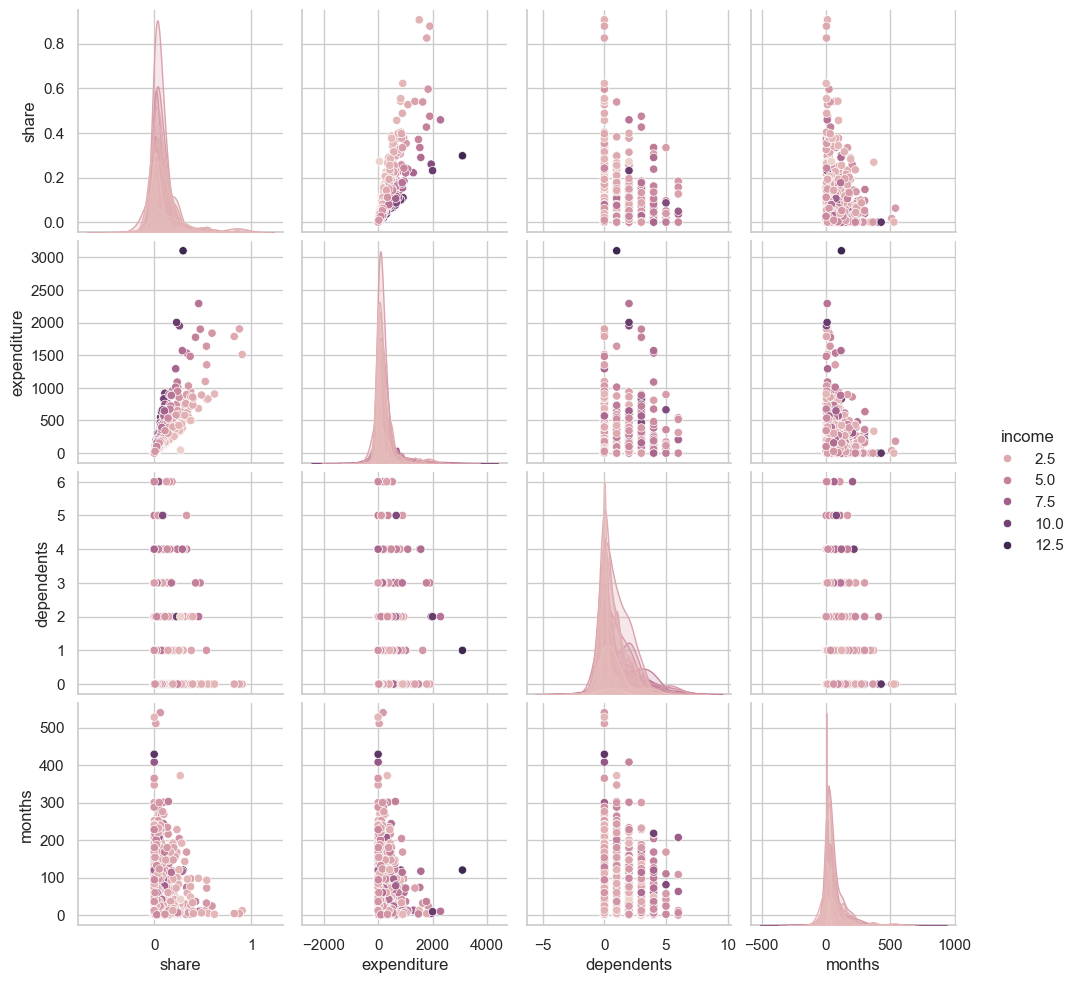

In [199]:
# 1. Pairplot
plt.figure(figsize=(10, 6))
sns.pairplot(creditcard_df, hue='income', vars=['share', 'expenditure', 'dependents', 'months'])
#plt.title('Pairplot of Numerical Variables by Income Group')
plt.show()

***Key Insights:***

1. **Share and Expenditure:** There appears to be a weak positive correlation between share and expenditure. As share increases, expenditure tends to increase slightly, although there is a significant amount of scatter.
2. **Dependents and Expenditure:** There seems to be a slight negative correlation between dependents and expenditure. As the number of dependents increases, expenditure tends to decrease slightly, but the relationship is not very strong.
3. **Months and Expenditure:** There is no clear relationship between months and expenditure. The data points are scattered, suggesting no strong correlation.

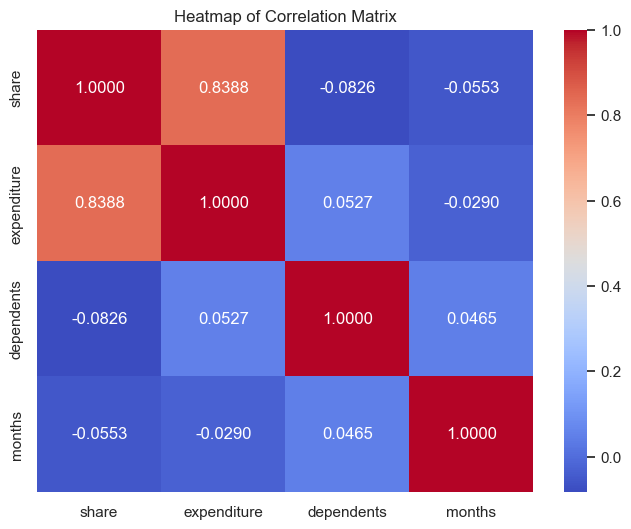

In [224]:
# 2. Heatmap of Correlation Matrix
plt.figure(figsize=(8, 6))
correlation_matrix = creditcard_df[['share', 'expenditure', 'dependents', 'months']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

**Key Insights:**

1. **Share and Expenditure:** There is a strong positive correlation between share and expenditure, as indicated by the bright red color in the corresponding cell. This suggests that as share increases, expenditure tends to increase significantly.
2. **Dependents and Expenditure:** There is a weak positive correlation between dependents and expenditure. The color in the corresponding cell is lighter red, indicating a less strong relationship. This suggests that as the number of dependents increases, expenditure tends to increase slightly, but the relationship is not as pronounced as the one between share and expenditure.

## PRINCIPAL COMPONENT ANALYSIS

Explained variance by PC1: 0.20892774789163018
Explained variance by PC2: 0.1765562598887135
Explained variance by PC3: 0.10508224739304879
Explained variance by PC4: 0.09768874465429556
Explained variance by PC5: 0.08973778532065012
Explained variance by PC6: 0.08656579793707612
Explained variance by PC7: 0.07065311961527847
Explained variance by PC8: 0.059922197158940343
Explained variance by PC9: 0.05002671843407094
Explained variance by PC10: 0.046037982900439194
Explained variance by PC11: 0.008801398805856914


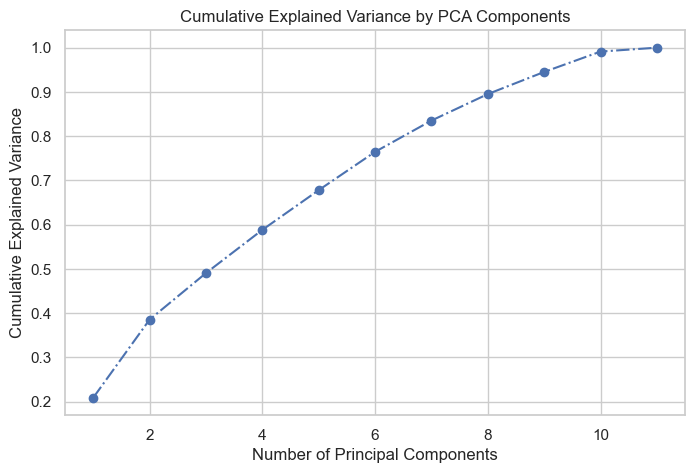

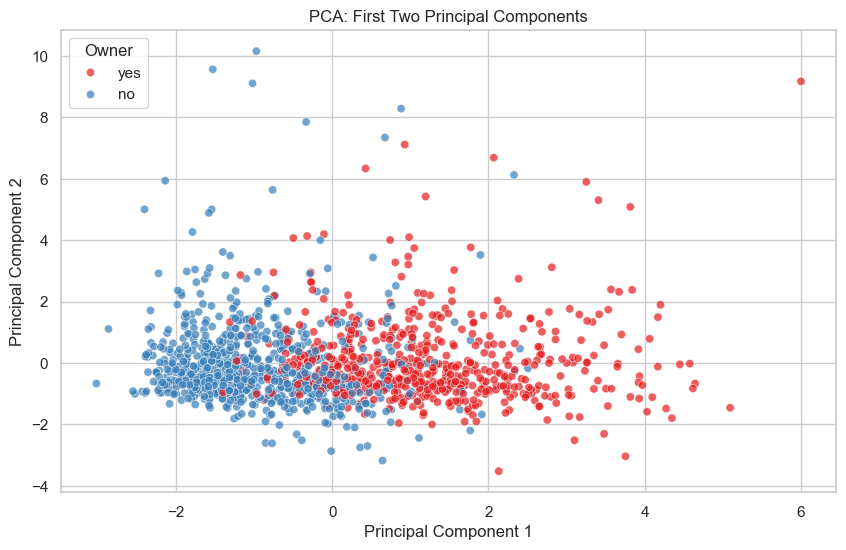

In [244]:
label_encoder = LabelEncoder()
creditcard_df['owner_encoded'] = label_encoder.fit_transform(creditcard_df['owner'])
creditcard_df['selfemp_encoded'] = label_encoder.fit_transform(creditcard_df['selfemp'])

numeric_df = creditcard_df[['reports', 'age', 'income', 'share', 'expenditure', 'owner_encoded', 'selfemp_encoded', 'dependents', 'months', 'majorcards', 'active']]
 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

pca = PCA(n_components=None)
principal_components = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

for i, var in enumerate(explained_variance):
    print(f"Explained variance by PC{i+1}: {var}")

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-.', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=creditcard_df['owner'], palette='Set1', alpha=0.7)
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Owner')
plt.show()


## BUCKETING OR BINNING

Text(0.5, 1.0, 'Age Distribution')

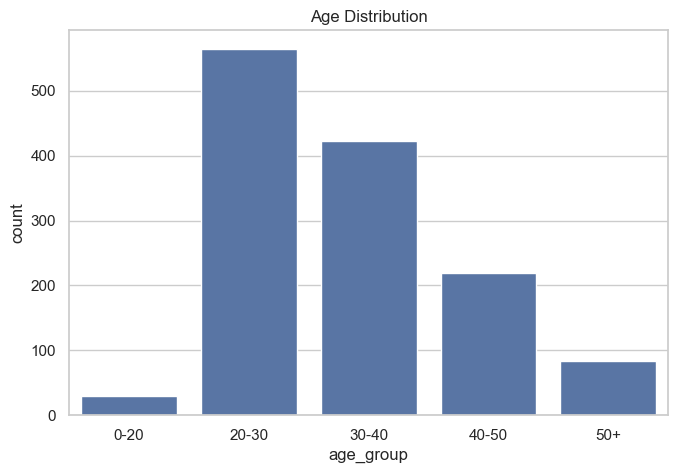

In [257]:
# Define age bins and labels for 5 age groups
bins = [0, 20, 30, 40, 50, 100]  # Age ranges: 0-20, 21-30, 31-40, 41-50, 51+
labels = ['0-20', '20-30', '30-40', '40-50', '50+']

# Create new column 'age_group' by categorizing the age into the defined bins
creditcard_df['age_group'] = pd.cut(creditcard_df['age'], bins = bins, labels = labels)

plt.figure(figsize=(17,11))
plt.subplot(2, 2, 2)
sns.countplot(x = creditcard_df['age_group'])
plt.title('Age Distribution')

Text(0.5, 1.0, 'Income Distribution')

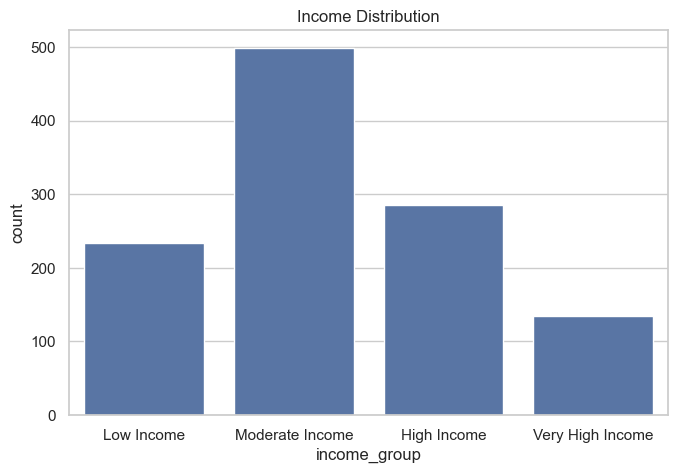

In [218]:
# Define income bins and labels for 4 income groups: low, moderate, high, very high income
income_bins = [1, 2, 3, 4, 5]  # Income ranges
income_labels = ['Low Income', 'Moderate Income', 'High Income', 'Very High Income']

# Create a new column 'income_group' by categorizing income into the defined bins
creditcard_df['income_group'] = pd.cut(creditcard_df['income'], bins = income_bins, labels = income_labels)

plt.figure(figsize=(17,11))
plt.subplot(2, 2, 2)
sns.countplot(x = creditcard_df['income_group'])
plt.title('Income Distribution')

## K - MEANS CLUSTERING

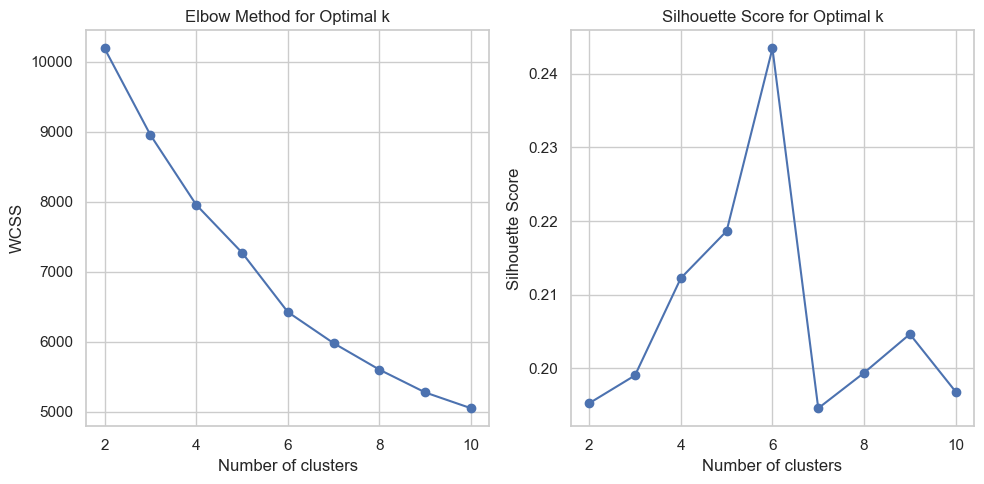

In [275]:
numeric_df = creditcard_df[['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']]

# Feature scaling
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_df)

# Elbow method: Within-cluster sum of squares (WCSS)
wcss = []
silhouette_scores = []

for i in range(2, 11):  # Start from 2 clusters as Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
    # Calculate silhouette score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_df, labels)
    silhouette_scores.append(silhouette_avg)

# Plot Elbow method (WCSS)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Plot Silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

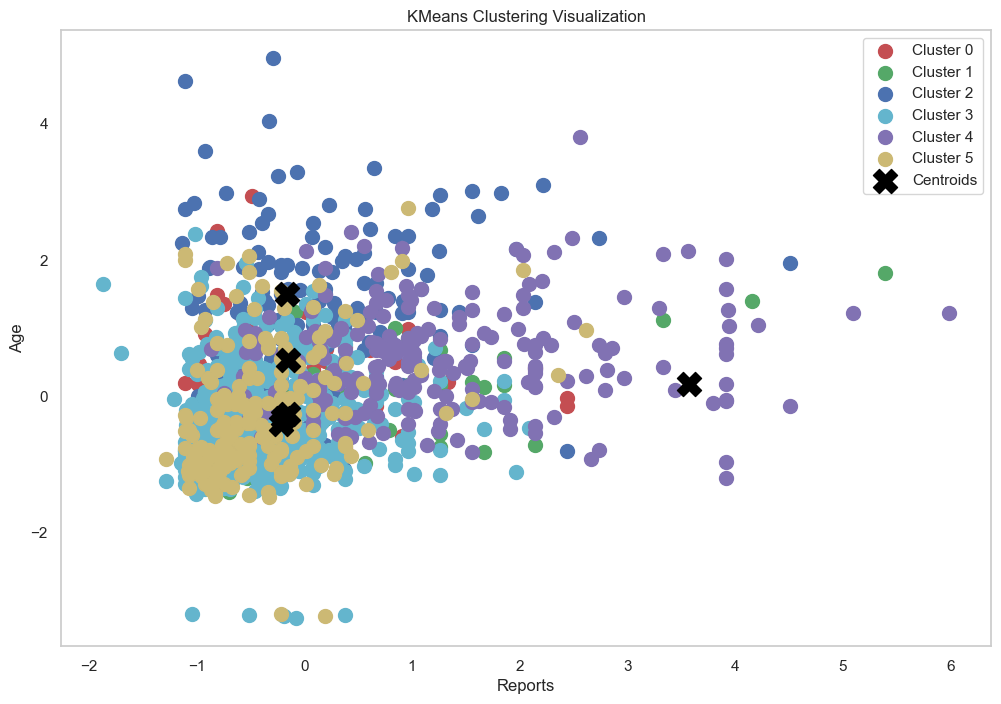

In [281]:
optimal_clusters = 6
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(scaled_df)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

clustered_df = pd.DataFrame(scaled_df, columns=numeric_df.columns)
clustered_df['Cluster'] = labels

plt.figure(figsize=(12, 8))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

for i in range(optimal_clusters):
    plt.scatter(clustered_df[clustered_df['Cluster'] == i]['income'],
                clustered_df[clustered_df['Cluster'] == i]['age'],
                s=100, c=colors[i], label=f'Cluster {i}')

plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='X', label='Centroids')
plt.title('KMeans Clustering Visualization')
plt.xlabel('Reports')
plt.ylabel('Age')
plt.legend()
plt.grid()
plt.show()
